<a href="https://colab.research.google.com/github/SamuellHMP/PCO102-2022.1/blob/main/PCO102_03_M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métricas

Foram escolhidas duas métricas para aplicar aos resultados apresentados na etapa anterior.

Desta forma, apresentar a melhor técnica para as métricas avaliativas utilizadas.

# Rede Neural Artificial

In [1]:
import numpy as np
import pandas as pd
import gdown
import os
import PIL
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
gdown.download(url='https://drive.google.com/uc?id=1lOWV8oBweRPSdUhZNRzEPZsD0R5VxGaX', output='Carla_Simulator.csv')

Downloading...
From: https://drive.google.com/uc?id=1lOWV8oBweRPSdUhZNRzEPZsD0R5VxGaX
To: /content/Carla_Simulator.csv
100%|██████████| 12.6M/12.6M [00:00<00:00, 142MB/s]


'Carla_Simulator.csv'

In [3]:
data = pd.read_csv("Carla_Simulator.csv",index_col=0)

In [4]:
data['class'].unique()

array(['apo', 'onder', 'hurcan', 'gonca', 'mehdi', 'berk', 'selin'],
      dtype=object)

In [5]:
x = data.drop(["class"],axis=1)
y = data["class"].values
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)
print("Train Set Shape: ", X_train.shape)
print("Test Set Shape: ", X_test.shape)

Train Set Shape:  (74518, 6)
Test Set Shape:  (24840, 6)


In [7]:
from tensorflow.python.keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [8]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dropout

early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(6,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(256, activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(7, activation='softmax',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
epochs = 10
hist = model.fit(X_train , y_train , epochs=epochs, validation_split=0.2)

Epoch 1/10
1863/1863 [==============================] - 20s 10ms/step - loss: 1.8742 - accuracy: 0.2125 - val_loss: 1.8579 - val_accuracy: 0.2171
Epoch 2/10
1863/1863 [==============================] - 18s 10ms/step - loss: 1.8540 - accuracy: 0.2230 - val_loss: 1.8505 - val_accuracy: 0.2165
Epoch 3/10
1863/1863 [==============================] - 19s 10ms/step - loss: 1.8499 - accuracy: 0.2265 - val_loss: 1.8441 - val_accuracy: 0.2270
Epoch 4/10
1863/1863 [==============================] - 18s 10ms/step - loss: 1.8472 - accuracy: 0.2291 - val_loss: 1.8308 - val_accuracy: 0.2525
Epoch 5/10
1863/1863 [==============================] - 19s 10ms/step - loss: 1.8368 - accuracy: 0.2420 - val_loss: 1.8414 - val_accuracy: 0.2290
Epoch 6/10
1863/1863 [==============================] - 18s 10ms/step - loss: 1.8281 - accuracy: 0.2475 - val_loss: 1.8187 - val_accuracy: 0.2652
Epoch 7/10
1863/1863 [==============================] - 18s 10ms/step - loss: 1.8231 - accuracy: 0.2511 - val_loss: 1.8129 -

## Métrica
Referência: https://www.tensorflow.org/tutorials/images/classification

Criação de gráficos de acurácia e perda nos conjuntos de treinamento e validação.

Os gráficos mostram que a precisão do treinamento e a precisão da validação estão com grandes margens, e o modelo alcançou apenas cerca de 26% de precisão no conjunto de validação.

Logo abaixo, o modelo é refeito aumentando o número de épocas de 10 para 20, e, com isso, obtem-se uma acurácia de quase 30%.

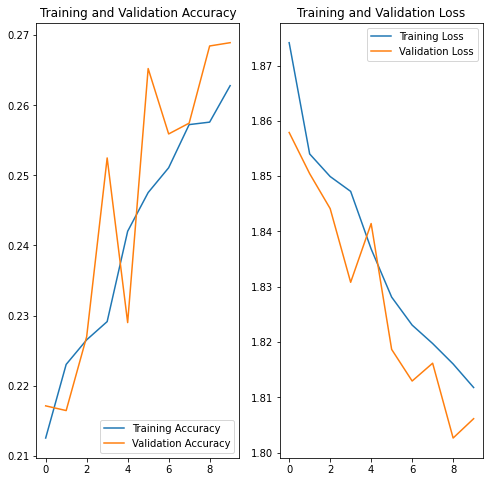

In [10]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
epochs = 20
hist = model.fit(X_train , y_train , epochs=epochs, validation_split=0.2)

Epoch 1/20
1863/1863 [==============================] - 19s 10ms/step - loss: 1.8099 - accuracy: 0.2635 - val_loss: 1.8008 - val_accuracy: 0.2647
Epoch 2/20
1863/1863 [==============================] - 18s 10ms/step - loss: 1.8075 - accuracy: 0.2656 - val_loss: 1.7990 - val_accuracy: 0.2705
Epoch 3/20
1863/1863 [==============================] - 17s 9ms/step - loss: 1.8020 - accuracy: 0.2677 - val_loss: 1.7943 - val_accuracy: 0.2712
Epoch 4/20
1863/1863 [==============================] - 18s 9ms/step - loss: 1.7968 - accuracy: 0.2737 - val_loss: 1.7849 - val_accuracy: 0.2805
Epoch 5/20
1863/1863 [==============================] - 18s 10ms/step - loss: 1.7914 - accuracy: 0.2769 - val_loss: 1.7805 - val_accuracy: 0.2833
Epoch 6/20
1863/1863 [==============================] - 18s 10ms/step - loss: 1.7863 - accuracy: 0.2771 - val_loss: 1.7836 - val_accuracy: 0.2738
Epoch 7/20
1863/1863 [==============================] - 18s 10ms/step - loss: 1.7861 - accuracy: 0.2773 - val_loss: 1.7811 - v

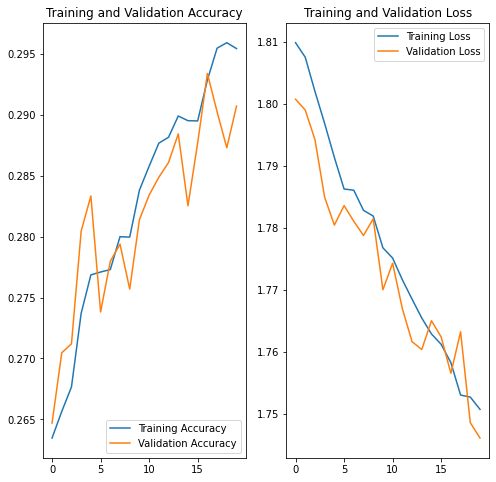

In [12]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Com essa visualização, é possível perceber que o modelo parece convergir para uma melhor acurária à medida que o número de épocas aumenta, porém, isso acontece lentamente. Na referência deste trabalho, o autor chegou a executar o modelo para 1100 épocas, obtendo uma acurácia de quase 55%.

Pode-se concluir que este modelo de Rede Neural Artificial não é o melhor classificador para o dataset trabalhado, e veremos a seguir modelos que alcançam uma taxa de acurária muito melhor com menos esforço computacional.

# Correlação Cruzada

In [9]:
from scipy import signal
import matplotlib.pyplot as plt
data_featured = pd.DataFrame()
data_prossed = pd.DataFrame()
labels = data['class'].unique()

for col in np.array([0,1,2,4,5,6]):    
    for label in labels:
        data_label = data[data['class']==label]
        acc_label_x = data_label.iloc[:,col]
        corr = signal.correlate(acc_label_x,np.ones(len(acc_label_x)),mode='same') / len(acc_label_x)
        data_featured=pd.concat([data_featured,pd.DataFrame(corr)], ignore_index=True)
        #clock= np.arange(64, len(acc_label_x), 128)
        #plt.plot(clock, corr[clock],label= label)
    data_prossed = pd.concat([data_prossed,data_featured],axis=1,ignore_index=True)
    data_featured = pd.DataFrame()
#plt.legend()
#plt.title('cross-correlation-features for AccelX')
#plt.show()

In [10]:
data_prossed['class'] = data['class']
x = data_prossed.drop(["class"],axis=1)
y = data_prossed["class"].values

In [11]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)

In [12]:
import xgboost as xgb

In [13]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train,y_train)
nb = GaussianNB()
nb.fit(X_train,y_train)
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
knn.fit(X_train,y_train)
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)

SVC(random_state=1)

## Métrica: Acurácia
Referência: https://www.kaggle.com/code/dasmehdixtr/high-accuracy-classification-via-cross-corrleation

Este modelo já possui uma acurácia muito melhor do que o primeiro, chegando a uma acurária de aproximadamente 84% para o método SVM e quase 100% para o KNN.

In [14]:
print("SVM accuracy is :",svm.score(X_test,y_test))
print('accuracy of bayes in test data is :', nb.score(X_test,y_test))
print('acc_of_sgd is: ', sgd.score(X_test,y_test))
print('acc_knn: ',knn.score(X_test,y_test))

SVM accuracy is : 0.8394524959742351
accuracy of bayes in test data is : 0.6294685990338165
acc_of_sgd is:  0.7347423510466988
acc_knn:  0.9999597423510467


#Conclusão

O melhor modelo de classificação dentre os aplicados é o KNN com uma acurácia de quase 100%.

Limitações: não consegui aplicar a métrica das curvas ROC, pois o dataset é muito grande, com várias classes, e ao tentar construir o vetor de previsões, depois de 40 minutos, o algoritmo não convergiu e abortei o processo.